In [ ]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalAveragePooling1D, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
class DataPreprocessor:
  def __init__(self, filepath, maxwords=10000, maxlen=50):
    self.filepath = filepath
    self.maxwords = maxwords
    self.maxlen = maxlen
    self.tokenizer = Tokenizer(num_words=maxwords)
    self.label_encoder = LabelEncoder()

  def load_and_clean(self):
    df = pd.read_csv(self.filepath)
    df = df.drop_duplicates()
    self.df = df
    return df

  def preprocess(self):
    texts = self.df["Comment"]
    self.tokenizer.fit_on_texts(texts)
    sequences = self.tokenizer.texts_to_sequences(texts)
    x_data = pad_sequences(sequences, maxlen=self.maxlen)

    y_encoded = self.label_encoder.fit_transform(self.df["Emotion"])
    y_data = to_categorical(y_encoded)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test, y_data.shape[1]

In [ ]:
class EmotionClassifier:
  def __init__(self, vocab_size, num_classes, input_length=50):
    self.model = Sequential([
        Embedding(vocab_size, 64, input_length=input_length),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')])
    self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

  def train(self, x_train, y_train, epochs=10, batch_size=32):
        checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

        history = self.model.fit(
            x_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=[checkpoint, reduce_lr])
        return history

  def plot_history(self, history):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['acc'], label='train accuracy')
        plt.plot(history.history['val_acc'], label='validation Accuracy')
        plt.title('accuracy over epochs')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train Loss')
        plt.plot(history.history['val_loss'], label='validation Loss')
        plt.title('loss over epochs')
        plt.legend()
        plt.tight_layout()
        plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - acc: 0.3659 - loss: 1.0934

119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - acc: 0.3667 - loss: 1.0931 - val_acc: 0.6126 - val_loss: 0.9776 - learning_rate: 0.0010
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - acc: 0.7461 - loss: 0.7190

119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - acc: 0.7467 - loss: 0.7176 - val_acc: 0.8789 - val_loss: 0.3508 - learning_rate: 0.0010
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.9765 - loss: 0.1147

119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - acc: 0.9765 - loss: 0.1147 - val_acc: 0.8874 - val_loss: 0.3168 - learning_rate: 0.0010
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - acc: 0.9924 - loss: 0.0477 - val_acc: 0.8989 - val_loss: 0.3288 - learning_rate: 0.0010
Epoch 5/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - acc: 0.9944 - loss: 0.0259

119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - acc: 0.9944 - loss: 0.0261 - val_acc: 0.9126 - val_loss: 0.2677 - learning_rate: 0.0010
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - acc: 0.9960 - loss: 0.0199 - val_acc: 0.9211 - val_loss: 0.2950 - learning_rate: 0.0010
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - acc: 0.9977 - loss: 0.0177 - val_acc: 0.9147 - val_loss: 0.3098 - learning_rate: 0.0010
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9940 - loss: 0.0220 - val_acc: 0.8979 - val_loss: 0.3691 - learning_rate: 0.0010
Epoch 9/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - acc: 0.9970 - loss: 0.0126 - val_acc: 0.9011 - val_loss: 0.3438 - learning_rate: 0.0010
Epoch 10/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - acc: 0.9976 - loss: 0.0141 - val_acc: 0.9053 - val_loss: 0.3315 - learning_rate: 0.0010


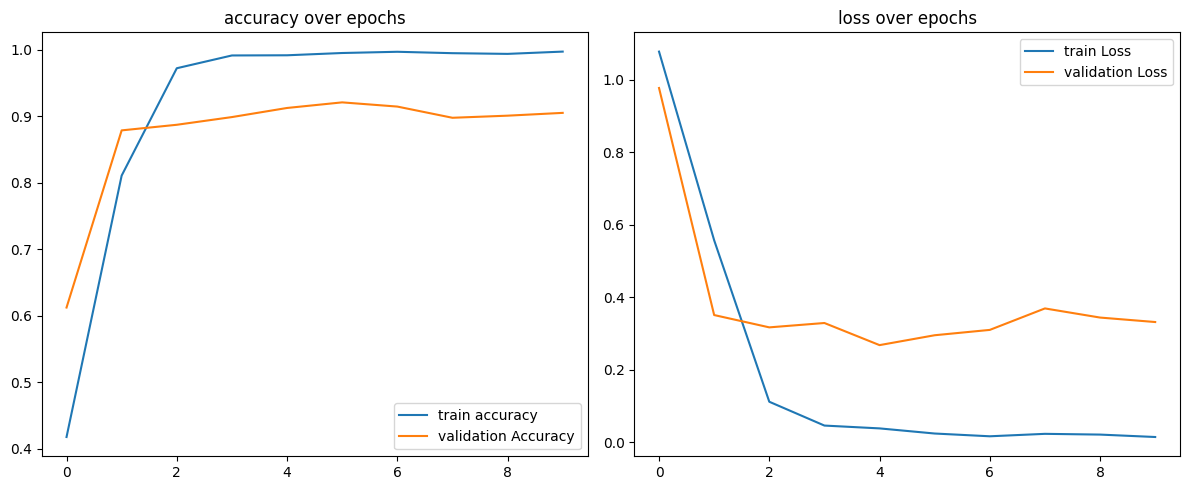

In [ ]:
processor = DataPreprocessor(filepath='/content/Emotion_classify_Data.csv')
processor.load_and_clean()
x_train, x_test, y_train, y_test, num_classes = processor.preprocess()

classifier = EmotionClassifier(vocab_size=10000, num_classes=num_classes)
history = classifier.train(x_train, y_train)

classifier.plot_history(history)

In [ ]:
y_pred = classifier.model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

wrong = np.where(y_true != y_pred_classes)[0]
true = np.where(y_true == y_pred_classes)[0]
for i in true[:10]:
    print(f"testo: {processor.df['Comment'].iloc[i]}")
    print(f"vero: {processor.label_encoder.inverse_transform([y_true[i]])[0]}")
    print(f"predetto: {processor.label_encoder.inverse_transform([y_pred_classes[i]])[0]}")
    print("   ")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
testo: i seriously hate one subject to death but now i feel reluctant to drop it
vero: anger
predetto: anger
   
testo: im so full of life i feel appalled
vero: joy
predetto: joy
   
testo: i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it
vero: fear
predetto: fear
   
testo: ive been really angry with r and i feel like an idiot for trusting him in the first place
vero: anger
predetto: anger
   
testo: i feel suspicious if there is no one outside like the rapture has happened or something
vero: anger
predetto: anger
   
testo: i feel jealous becasue i wanted that kind of love the true connection between two souls and i wanted that
vero: fear
predetto: fear
   
testo: when a friend of mine keeps telling me morbid things that happened to his dog
vero: fear
predetto: fear
   
testo: i finally fell asleep feeling angry useless and still full of anxiety
vero: joy
predett

In [ ]:
for i in wrong[:10]:
    print(f"testo: {processor.df['Comment'].iloc[i]}")
    print(f"vero: {processor.label_encoder.inverse_transform([y_true[i]])[0]}")
    print(f"predetto: {processor.label_encoder.inverse_transform([y_pred_classes[i]])[0]}")
    print("   ")

testo: i remember feeling as if i didn t belong and that i wasn t smart enough cool enough or even young enough
vero: joy
predetto: anger
   
testo: i feel much better and without the help of ice
vero: joy
predetto: anger
   
testo: i stropped about for a bit feeling grumpy because i was missing out
vero: joy
predetto: fear
   
testo: i feel so grouchy and irritable when im sick
vero: anger
predetto: fear
   
testo: im feeling a bit more sociable now although i dont think ill be able to express everything i want to say
vero: fear
predetto: anger
   
testo: i felt good and feel fine today too
vero: joy
predetto: fear
   
testo: i feel our hearts are treading dangerous territory
vero: fear
predetto: anger
   
testo: i would accept your gift without feeling mad
vero: anger
predetto: joy
   
testo: i fear that other people ask me about my feelings i am most reluctant to talk about things
vero: joy
predetto: anger
   
testo: i feel so comfortable around him
vero: anger
predetto: joy
   


In [ ]:
print(processor.df['Emotion'].value_counts())

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64
